In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('tensorflow version:',tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import PIL
print('PIL version:',PIL.__version__)
import os
import numpy as np
print('numpy version:',np.__version__)
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib version:',matplotlib.__version__)
import tensorflow_hub as hub
from keras import applications

import warnings
warnings.filterwarnings("ignore")

# Shared Input Layer
#from keras.utils import plot_model
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Lambda
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import concatenate
from keras import backend
#from google.colab import drive
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.image import ImageDataGenerator

2023-07-08 18:54:25.466742: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1
tensorflow version: 2.9.2
PIL version: 7.1.2
numpy version: 1.21.6
matplotlib version: 3.2.2


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jul  8 18:54:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 4000     Off  | 00000000:3B:00.0  On |                  N/A |
| 30%   55C    P8    16W / 125W |    276MiB /  7979MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/FInal selected Raw Data/800x800 Patched and flipped' # data root path
classes_dir = ['BD Normal'] #total labels

val_ratio = 0.10
test_ratio = 0.10

for cls in classes_dir:
    os.makedirs(root_dir +'train_/' + cls)
    os.makedirs(root_dir +'val_/' + cls)
    os.makedirs(root_dir +'test_/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir +'/'+cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for cls in classes_dir:
       # Copy-pasting images
        for name in train_FileNames:
              shutil.copy(name, root_dir +'train_/' + cls)

        for name in val_FileNames:
              shutil.copy(name, root_dir +'val_/' + cls)

        for name in test_FileNames:
               shutil.copy(name, root_dir +'test_/' + cls)

Total images:  7128
Training:  5702
Validation:  713
Testing:  713


In [8]:
# # Creating Train / Val / Test folders (One time use)
import os
import numpy as np
import shutil
import random
root_dir = '/home/mishra/Documents/Ayesha/Ayesha 2/FInal selected Raw Data/800x800 Patched and flipped' # data root path
classes_dir = ['BD Parallel'] #total labels

val_ratio = 0.10
test_ratio = 0.10

for cls in classes_dir:
    os.makedirs(root_dir +'train_/' + cls)
    os.makedirs(root_dir +'val_/' + cls)
    os.makedirs(root_dir +'test_/' + cls)


# Creating partitions of the data after shuffeling
src = root_dir +'/'+cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

for cls in classes_dir:
       # Copy-pasting images
        for name in train_FileNames:
              shutil.copy(name, root_dir +'train_/' + cls)

        for name in val_FileNames:
              shutil.copy(name, root_dir +'val_/' + cls)

        for name in test_FileNames:
               shutil.copy(name, root_dir +'test_/' + cls)

Total images:  7128
Training:  5702
Validation:  713
Testing:  713


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_dataset = train_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/FInal selected Raw Data/800x800 Patched and flippedtrain_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical',
         color_mode = 'rgb')

Found 11404 images belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
validation_dataset = validation_datagen.flow_from_directory(
        '/home/mishra/Documents/Ayesha/Ayesha 2/FInal selected Raw Data/800x800 Patched and flippedval_',
        target_size=(224, 224),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')

Found 1426 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
test_dataset = test_datagen.flow_from_directory(
    '/home/mishra/Documents/Ayesha/Ayesha 2/FInal selected Raw Data/800x800 Patched and flippedtest_',
    target_size=(224, 224),
    batch_size=batch_size,
    shuffle=False,
        class_mode='categorical',
         color_mode = 'rgb')

Found 1426 images belonging to 2 classes.


In [15]:
for image_batch, label_batch in train_dataset:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(32, 224, 224, 3)
(32, 2)


In [16]:
class_names_train = train_dataset.class_indices
print(class_names_train)
class_names_validation = validation_dataset.class_indices
print(class_names_validation)

{'BD Normal': 0, 'BD Parallel': 1}
{'BD Normal': 0, 'BD Parallel': 1}


In [17]:
base_model1 = tf.keras.applications.VGG16(weights='imagenet',
                                include_top=False, 
                                input_shape=(224, 224,3))

2023-07-08 18:57:54.854087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 18:57:58.313540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6376 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [18]:
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
num = 2

model1= tf.keras.Sequential([
      base_model1,
     layers.Flatten(),
     #layers.Dense(512, activation='relu'),
     layers.Dropout(0.5),
  tf.keras.layers.Dense(num, activation = 'softmax' )
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 14,764,866
Non-trainable params: 0
_________________________________________________________________


In [21]:
optimizers = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(
  optimizer=optimizers,
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
  metrics=['acc'])

history= model1.fit(train_dataset, 
                   validation_data = validation_dataset, 
                   epochs= 10)

Epoch 1/10


2023-07-08 18:58:39.354481: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


357/357 [==============================] - 188s 463ms/step - loss: 0.0629 - acc: 0.9732 - val_loss: 2.6830e-04 - val_acc: 1.0000
Epoch 2/10
357/357 [==============================] - 161s 451ms/step - loss: 0.0100 - acc: 0.9962 - val_loss: 5.4228e-04 - val_acc: 1.0000
Epoch 3/10
357/357 [==============================] - 161s 449ms/step - loss: 0.0120 - acc: 0.9955 - val_loss: 9.4117e-05 - val_acc: 1.0000
Epoch 4/10
357/357 [==============================] - 162s 453ms/step - loss: 7.2040e-05 - acc: 1.0000 - val_loss: 1.2773e-05 - val_acc: 1.0000
Epoch 5/10
357/357 [==============================] - 162s 452ms/step - loss: 1.9520e-06 - acc: 1.0000 - val_loss: 4.4143e-06 - val_acc: 1.0000
Epoch 6/10
357/357 [==============================] - 162s 453ms/step - loss: 1.3370e-06 - acc: 1.0000 - val_loss: 2.8136e-06 - val_acc: 1.0000
Epoch 7/10
357/357 [==============================] - 162s 452ms/step - loss: 2.0533e-06 - acc: 1.0000 - val_loss: 5.1265e-06 - val_acc: 1.0000
Epoch 8/10
357/

In [22]:
model1.save("Vgg16_new_patched.h5")

In [23]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model("model_VGG16_unseen_final_mixed.h5")

# # Perform evaluation on a test dataset
# test_loss, test_accuracy = loaded_model.evaluate(test_dataset)

# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

# # Make predictions on new data
# #predictions = loaded_model.predict(new_data)


In [24]:
# #Make predictions on new data
# predictions = loaded_model.predict(test_dataset)


In [25]:
model1.evaluate(test_dataset)

45/45 [==============================] - 18s 398ms/step - loss: 6.6125e-07 - acc: 1.0000


[6.612543757000822e-07, 1.0]

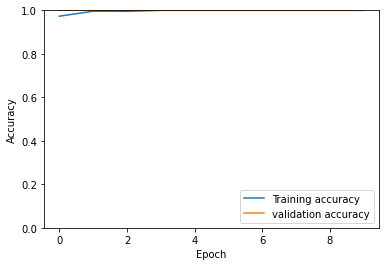

In [26]:
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('VGG16_accuracy_new.png',bbox_inches=None)
plt.show()

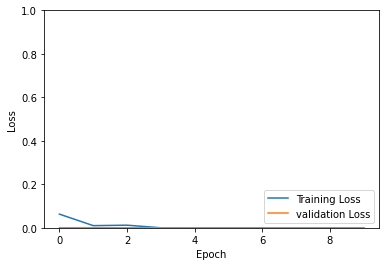

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.savefig('VGG16_loss_new.png',bbox_inches=None)
plt.show()

In [28]:
# print('Validate the model')
# final_result = loaded_model.evaluate(
#     validation_dataset,
#     #steps = 3590
# )

In [29]:
# from time import time

In [30]:
# t0 = time()
# #validation_dataset.reset()
# val_predict = loaded_model.predict(
#     validation_dataset,
# #     steps = 3590,
#     verbose = 1)
# print('Time taken to evaluate the model:',int(time()-t0),'seconds')

In [31]:
# validation_samples = val_predict.shape[0]
# print('Number of data points in validation set:',validation_samples)

In [32]:
# val_predicted_classes = np.argmax(val_predict, axis = 1)
# val_true_classes = validation_dataset.classes
# val_class_labels = list(validation_dataset.class_indices.keys())

In [33]:
import sklearn.metrics as metrics

In [34]:
# validation_report = metrics.classification_report(val_true_classes, val_predicted_classes, target_names=val_class_labels)
# print('The validation report is as follows:')
# print(validation_report)

In [35]:
# val_conf_matrix = tf.math.confusion_matrix(labels=val_true_classes, predictions=val_predicted_classes).numpy()
# print(val_conf_matrix)

In [36]:
 import seaborn as sns

In [37]:
# figure1 = plt.figure()
# val_conf_matrix = val_conf_matrix.astype('float') / val_conf_matrix.sum(axis=1)[:, np.newaxis]
# sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens)
# plt.tight_layout()
# plt.ylabel('True Label')
# plt.xlabel('Predicted label')
# plt.savefig('Validation data Confusion Matrix', dpi=250)

In [38]:
print('Testing the model')
final_result = model1.evaluate(
    test_dataset,
    #steps = 3591
)

Testing the model
45/45 [==============================] - 18s 394ms/step - loss: 6.6125e-07 - acc: 1.0000


In [39]:
#test_dataset.reset()
predict_on_test_data = model1.predict(
    test_dataset,
    #steps = 3591,
    verbose = 1
)

45/45 [==============================] - 18s 399ms/step


In [40]:
print('Number of data points in test set:',predict_on_test_data.shape[0])

Number of data points in test set: 1426


In [41]:
predicted_classes = np.argmax(predict_on_test_data,axis=1)
predict_true_classes = test_dataset.classes
predict_class_labels = list(test_dataset.class_indices.keys())

In [42]:
test_report = metrics.classification_report(predict_true_classes, predicted_classes, target_names = predict_class_labels)
print(test_report)

              precision    recall  f1-score   support

   BD Normal       1.00      1.00      1.00       713
 BD Parallel       1.00      1.00      1.00       713

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



In [43]:
test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes,predictions = predicted_classes).numpy()
print(test_confusion_matrix)

[[713   0]
 [  0 713]]


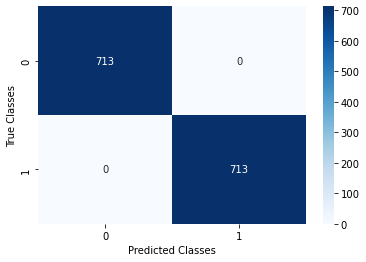

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_confusion_matrix = tf.math.confusion_matrix(labels=predict_true_classes, predictions=predicted_classes).numpy()

sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

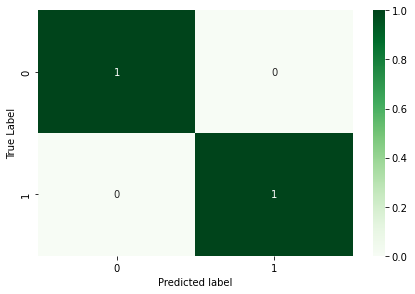

In [45]:
figure1 = plt.figure()
test_confusion_matrix = test_confusion_matrix.astype('float') / test_confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(test_confusion_matrix, annot = True, cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()